# EDA of Covid-19 vaccines

**Source:https://www.kaggle.com/gpreda/covid-world-vaccination-progress**

**Content:**


Country : This is the country for which the vaccination information is provided.

Country ISO Code - ISO code for the country.

Date - date for the data entry.

Total number of vaccinations - this is the absolute number of total immunizations in the country.

Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country;

Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;

Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;

Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;

Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;

Number of vaccinations per day - number of daily vaccination for that day and country;

Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;

Vaccines used in the country - total number of vaccines used in the country (up to date);

Source name - source of the information (national authority, international organization, local organization etc.);

Source website - website of the source of information;


**Objectives:**

1. Which country is using what vaccine?
2. In which country the vaccination programme is more advanced?
3. Where are vaccinated more people per day? But in terms of percent from entire population ?

**EDA Procedure:**
1. Importing necessary libraries
2. Importing data set
3. Data preprocessing (removing the variables with large number of null values and renaming variables)
4. Analysis
5. Conclusion

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import cufflinks as cf
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly as py
import plotly.offline as iplot
from countryinfo import CountryInfo
import plotly.tools as tls
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#importing data set and assigning variable name cv
cv = pd.read_csv("country_vaccinations.csv")
cv

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,Wales,NaN,2021-02-16,820339.0,807351.0,12988.0,17161.0,23033.0,26.02,25.61,0.41,7305.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3805,Wales,NaN,2021-02-17,841975.0,822633.0,19342.0,21636.0,22012.0,26.70,26.09,0.61,6982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3806,Wales,NaN,2021-02-18,864498.0,839065.0,25433.0,22523.0,20649.0,27.42,26.61,0.81,6549.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3807,Wales,NaN,2021-02-19,885906.0,853904.0,32002.0,21408.0,18891.0,28.10,27.08,1.02,5992.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [4]:
# top 10 rows
cv.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [5]:
#lower tail rows
cv.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3804,Wales,NaN,2021-02-16,820339.0,807351.0,12988.0,17161.0,23033.0,26.02,25.61,0.41,7305.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3805,Wales,NaN,2021-02-17,841975.0,822633.0,19342.0,21636.0,22012.0,26.70,26.09,0.61,6982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3806,Wales,NaN,2021-02-18,864498.0,839065.0,25433.0,22523.0,20649.0,27.42,26.61,0.81,6549.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3807,Wales,NaN,2021-02-19,885906.0,853904.0,32002.0,21408.0,18891.0,28.10,27.08,1.02,5992.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3808,Wales,NaN,2021-02-20,897856.0,860083.0,37773.0,11950.0,17376.0,28.48,27.28,1.20,5511.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


# Analysis

In [6]:
cv.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.467000e+03,2.091000e+03,1.383000e+03,2.080000e+03,3.670000e+03,2467.000000,2091.000000,1383.000000,3670.000000
mean,1.548831e+06,1.348223e+06,4.039590e+05,7.407932e+04,5.597138e+04,6.415403,5.327097,1.915828,2388.492371
std,5.144890e+06,4.221696e+06,1.533209e+06,2.072067e+05,1.760673e+05,12.006860,8.826368,4.864313,4507.446997
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.978100e+04,2.782250e+04,9.085500e+03,1.970000e+03,1.121000e+03,0.595000,0.570000,0.140000,324.000000
50%,1.939170e+05,1.752250e+05,3.891100e+04,1.142800e+04,5.695500e+03,2.480000,2.350000,0.740000,1015.500000
75%,7.850500e+05,6.745450e+05,2.066910e+05,5.581300e+04,2.683650e+04,5.740000,4.470000,1.580000,1974.000000
max,6.309063e+07,4.362809e+07,1.886532e+07,2.242472e+06,1.916190e+06,87.070000,50.460000,37.320000,54264.000000


In [7]:
#null values
cv.isnull().sum()

country                                   0
iso_code                                280
date                                      0
total_vaccinations                     1342
people_vaccinated                      1718
people_fully_vaccinated                2426
daily_vaccinations_raw                 1729
daily_vaccinations                      139
total_vaccinations_per_hundred         1342
people_vaccinated_per_hundred          1718
people_fully_vaccinated_per_hundred    2426
daily_vaccinations_per_million          139
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [8]:
del cv['people_vaccinated'] # number of null values are large
del cv['people_fully_vaccinated']# number of null values are large
del cv['daily_vaccinations_raw']# number of null values are large
del cv['people_vaccinated_per_hundred']# number of null values are large
del cv['people_fully_vaccinated_per_hundred']# number of null values are large
del cv['source_website'] # unnecessary variable 
del cv["iso_code"] # unneccessary variable
del cv['total_vaccinations']# number of null values are large
del cv['total_vaccinations_per_hundred']# number of null values are large

<AxesSubplot:>

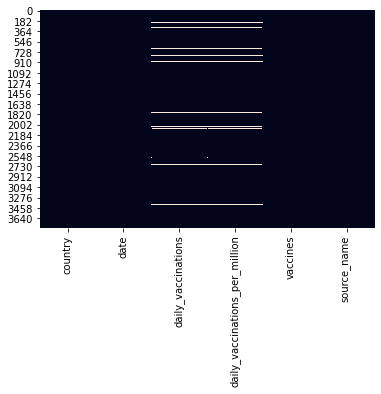

In [9]:
# Representing null values using heatmap
sb.heatmap(cv.isnull(),cbar = False)

In [10]:
## Renaming column names
cv = cv.rename(columns = {"daily_vaccinations":"daily_vacc","daily_vaccinations_per_million":"daily_vacc_per_mill"})
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              3809 non-null   object 
 1   date                 3809 non-null   object 
 2   daily_vacc           3670 non-null   float64
 3   daily_vacc_per_mill  3670 non-null   float64
 4   vaccines             3809 non-null   object 
 5   source_name          3809 non-null   object 
dtypes: float64(2), object(4)
memory usage: 178.7+ KB


In [11]:
#countries using vaccination till 5th Febraury 2021 and the vaccines they are using
cv[['country','vaccines']].value_counts().reset_index()

,country,vaccines,0
0,Wales,"Oxford/AstraZeneca, Pfizer/BioNTech",70
1,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",70
2,Scotland,"Oxford/AstraZeneca, Pfizer/BioNTech",70
3,Northern Ireland,"Oxford/AstraZeneca, Pfizer/BioNTech",70
4,England,"Oxford/AstraZeneca, Pfizer/BioNTech",70
...,...,...,...
96,New Zealand,Pfizer/BioNTech,3
97,Japan,Pfizer/BioNTech,3
98,Dominican Republic,Oxford/AstraZeneca,2
99,Greenland,Pfizer/BioNTech,1


In [12]:
#number of vaccines
cv["vaccines"].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1046
Pfizer/BioNTech                                                                        865
Oxford/AstraZeneca, Pfizer/BioNTech                                                    631
Moderna, Pfizer/BioNTech                                                               324
Sputnik V                                                                              213
Oxford/AstraZeneca                                                                     146
Sinovac                                                                                 80
Pfizer/BioNTech, Sinovac                                                                69
Oxford/AstraZeneca, Sinopharm/Beijing                                                   67
Pfizer/BioNTech, Sinopharm/Beijing                                                      61
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                                             57

In [13]:
#renaming vaccine names
vaccine = {"vaccines":{"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech": "Moderna,AstraZeneca,Pfizer", 
                           "Pfizer/BioNTech": "Pfizer","Oxford/AstraZeneca, Pfizer/BioNTech": "AstraZeneca,Pfizer",
                           "Moderna, Pfizer/BioNTech":"Moderna,Pfizer","Pfizer/BioNTech, Sinovac":"Pfizer,Sinovac",
                           "Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac":"Sinopharm,Sinovac",
                           "Pfizer/BioNTech, Sinopharm/Beijing":"Pfizer,Sinopharm","Oxford/AstraZeneca":"AstraZeneca",
                          "Oxford/AstraZeneca, Sinopharm/Beijing":"AstraZeneca,Sinopharm",
                          "Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V":"AstraZeneca,Pfizer,Sinopharm,Sputnik V",
                           "Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V":"Pfizer,Sinopharm,Sputnik V",
                          "Covaxin, Oxford/AstraZeneca":"Covaxin,AstraZeneca","Oxford/AstraZeneca, Sinovac":"AstraZeneca,Sinovac",
                          "Sinopharm/Beijing":"Sinopharm","Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V":"AstraZeneca,Sinopharm,Sputnik V",
                          "Oxford/AstraZeneca, Sputnik V":"AstraZeneca, Sputnik V"}}
cv= cv.replace(vaccine)
                

In [14]:
#bar graph for country with respect to vaccines
country_vac=pd.crosstab(cv['country'],cv['vaccines'])
country_vac.iplot(kind="bar",barmode="stack")
print('Wales, Scotland,UK,England and Northern ireland are usnig the Oxford/AstraZeneca and Pfizer/BioNTech vaccines from 70 days till 21st February 2021')
print('India using Covaxin and Oxford/AstraZeneca from 38 days till 21st Febraury 2021')

Wales, Scotland,UK,England and Northern ireland are usnig the Oxford/AstraZeneca and Pfizer/BioNTech vaccines from 70 days till 21st February 2021
India using Covaxin and Oxford/AstraZeneca from 38 days till 21st Febraury 2021


In [15]:
# Bar plot for different health organisations
cv.source_name.value_counts().sort_values(ascending=False).iplot(kind="bar")
print('Highest number of Vaccines supplied by ministry of health')

Highest number of Vaccines supplied by ministry of health


In [16]:
# creating new data frame that includes the data of only Ministry of Health
df = cv[cv.source_name.str.startswith("Ministry of Health")]
df

,country,date,daily_vacc,daily_vacc_per_mill,vaccines,source_name
0,Albania,2021-01-10,NaN,NaN,Pfizer,Ministry of Health
1,Albania,2021-01-11,64.0,22.0,Pfizer,Ministry of Health
2,Albania,2021-01-12,64.0,22.0,Pfizer,Ministry of Health
3,Albania,2021-01-13,63.0,22.0,Pfizer,Ministry of Health
4,Albania,2021-01-14,66.0,23.0,Pfizer,Ministry of Health
...,...,...,...,...,...,...
3552,Turks and Caicos Islands,2021-02-04,222.0,5734.0,Pfizer,Ministry of Health
3553,Turks and Caicos Islands,2021-02-05,222.0,5734.0,Pfizer,Ministry of Health
3554,Turks and Caicos Islands,2021-02-06,222.0,5734.0,Pfizer,Ministry of Health
3555,Turks and Caicos Islands,2021-02-07,222.0,5734.0,Pfizer,Ministry of Health


In [17]:
# countries that are using vaccines provided by the ministry of health
df[['country','vaccines']].value_counts().reset_index()

,country,vaccines,0
0,Bahrain,"Pfizer,Sinopharm",61
1,Czechia,"Moderna,AstraZeneca,Pfizer",57
2,Greece,"Moderna,AstraZeneca,Pfizer",56
3,Poland,"Moderna,AstraZeneca,Pfizer",56
4,Oman,"AstraZeneca,Pfizer",56
5,Lithuania,"Moderna,AstraZeneca,Pfizer",56
6,Argentina,Sputnik V,55
7,Bulgaria,"Moderna,AstraZeneca,Pfizer",55
8,Belarus,Sputnik V,53
9,Croatia,Pfizer,51


In [18]:
# Bar plot for countries using vaccinations provided by the Ministry of Health
country_vac=pd.crosstab(df['country'],df['vaccines'])
country_vac.iplot(kind="bar",barmode="stack")

For 35 countries Ministry of Health is providing vaccines including India and compare to other vaccines "Pfizer/BioNTech" is in high demand.

In [19]:
ministry_health = ['Ministry of Health']

In [20]:
# Selecting the rows which includes only "Ministry of Health" in source_name column
min_health = cv.loc[cv['source_name'].isin(ministry_health)]

In [21]:
# drop the rows which includes only "Ministry of Health" in source_name column
other_org = cv.loc[~cv["source_name"].isin(ministry_health)]

In [22]:
print("Share of Ministry of Health in %: ") 
print(len(min_health)/len(cv)*100)
print("-------------------------------------")
print("Share of other Organiation in % : ") 
print(len(other_org)/len(cv)*100)

Share of Ministry of Health in %: 
29.824100813861904
-------------------------------------
Share of other Organiation in % : 
70.1758991861381


In [23]:
# Bar plot for date of vaccination with respect to vaccines 
date_vac=pd.crosstab(cv['date'],cv['vaccines'])
date_vac.iplot(kind="bar",barmode="stack")
print("The process of vaccination is increasing day by day and Pfizer/BioNTech vaccines are used more compare to other vaccines.")

The process of vaccination is increasing day by day and Pfizer/BioNTech vaccines are used more compare to other vaccines.


In [24]:
# Grouping the countries with respect to daily vaccination per million people
x = cv.groupby('country').sum()
x = x.sort_values(['daily_vacc_per_mill'],ascending=False)
x.head(10)

,daily_vacc,daily_vacc_per_mill
country,,
Gibraltar,30360.0,901135.0
Israel,7086545.0,818726.0
Seychelles,63002.0,640655.0
United Arab Emirates,4647421.0,469889.0
Falkland Islands,1512.0,434112.0
Cayman Islands,17664.0,268760.0
Wales,841937.0,267040.0
England,14489557.0,257425.0
United Kingdom,17161894.0,252802.0


In Gibraltar highest number of people daily vaccinated per million

In [25]:
# Grouping the countries with respect to daily vaccination of people
df = cv.groupby('country').sum()
df = df.sort_values(['daily_vacc'],ascending=False)
df.head(10)

,daily_vacc,daily_vacc_per_mill
country,,
United States,58026567.0,173503.0
China,34922496.0,24255.0
United Kingdom,17161894.0,252802.0
England,14489557.0,257425.0
India,10299531.0,7463.0
Israel,7086545.0,818726.0
Turkey,6362981.0,75447.0
Brazil,6204142.0,29189.0
Germany,4783465.0,57094.0


In United States highest number people daily vaccinated

In [26]:
# Population of the United States
country = CountryInfo('United States')
country.population()

319259000

In [27]:
# Percentage of number of people vaccinated per population in United States
(58026567/319259000)*100

18.175389573982255

12.18% of the whole population are vaccinated in United States

In [28]:
# Population of the India
country = CountryInfo('India')
country.population()

1263930000

In [29]:
(10299531/1263930000)*100

0.8148814412190548

 0.81% of the whole population are vaccinated in India

In [30]:
# Daily Vaccination Trend
px.line(cv, x = 'date', y ='daily_vacc', color = 'country',title = 'Daily vaccination Trend')

By graphical representation we can say that in United States highest number people daily vaccinated regularly.

In [31]:
# World map view of different countries for different vaccinations
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['vaccines'],
                    title="Countries using vaccine (different colors for each vaccine)")
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()
print('Different countries colored on the map with respect to vaccines')

Different countries colored on the map with respect to vaccines


In [32]:
# World map view of different countries for "Daily Vaccination per Million"
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['daily_vacc_per_mill'],
                    title="Daily Vaccination per Million")
fig.update_layout({'legend_orientation':'v'})
fig.show()
print('Daily vaccination of different countries per million')

Daily vaccination of different countries per million


In [33]:
# World map view of different countries for "Daily Vaccination"
fig = px.choropleth(locations=cv['country'], 
                    locationmode="country names",
                    color=cv['daily_vacc'],
                    title="Daily Vaccination")
fig.update_layout({'legend_orientation':'v'})
fig.show()
print('Daily vaccination for different countires')

Daily vaccination for different countires


### Conclusion:

1. Wales, Scotland,UK,England and Northern ireland are  usnig the Oxford/AstraZeneca and Pfizer/BioNTech vaccines from 70 days. 
2. 29.82% of vaccine is supplied by Ministry of Health and 70.18% of vaccines are suplied by other health organisations.
3. Pfizer/BioNTech vaccine is in more demand compare to other vaccines.
4. Vaccination program is increasing in the world day by day. 
5. Gibraltar vaccinated more number of people per million and the growth of vaccinating prople per day is highly increasing in      United States.
6. United states has already vaccinated nearly 18% of the whole population and India vaccinated 0.81% of the whole population. 